<a href="https://colab.research.google.com/github/ivelin/canswim/blob/main/canswim_sandbox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is an experimental attempt to implement growth stock indicators in support of CANSLIM style investors and traders.

## Prepare Environment

Jupyter notebook housekeeping

In [1]:

%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
%matplotlib inline


### Install local canswim package

In [2]:
# pip install -r requirements.txt
# !pip install -e ./

import sys
!{sys.executable} -m pip install -e ./


Obtaining file:///home/ivelin/canswim
  Preparing metadata (setup.py) ... done
  Attempting uninstall: canswim
    Found existing installation: canswim 0.0.1
    Uninstalling canswim-0.0.1:
      Successfully uninstalled canswim-0.0.1
  Running setup.py develop for canswim


## Prepare Model

In [3]:
from canswim.model import CanswimModel

canswim_model = CanswimModel()

canswim_model.load_data()


n_test_range_days: 630
min_samples: 1890
Configuring CUDA GPU
earnings_loaded_df.columns Index(['symbol', 'date', 'eps', 'epsEstimated', 'time', 'revenue',
       'revenueEstimated', 'updatedFromDate', 'fiscalDateEnding'],
      dtype='object')


In [4]:
# canswim_model.covariates.load_past_covariates()
# canswim_model.covariates.load_future_covariates()

In [5]:

def prepare_data():
    canswim_model.prepare_data()
    canswim_model.plot_splits()
    canswim_model.plot_seasonality()



n_stocks:  50
n_epochs:  10
Training loop stock subset: ['FMX', 'VUZI', 'OFLX', 'ROST', 'GWW', 'AEE', 'WTBA', 'HRL', 'IT', 'MSI', 'AVD', 'VSEC', 'CMCL', 'FLEX', 'CYRX', 'HPP', 'STNG', 'IDXX', 'SRCE', 'TMO', 'TSLX', 'HCI', 'KLAC', 'NXDT', 'RHI', 'ARCB', 'PKBK', 'ARAY', 'FDS', 'CVLG', 'FNLC', 'AKTS', 'OTTR', 'NAVI', 'NBN', 'NAT', 'NEM', 'CEVA', 'LPG', 'ANGO', 'PNW', 'NXPI', 'CODI', 'KWR', 'PYPL', 'KFS', 'NFBK', 'RMAX', 'GBDC', 'SCWO']
Preparing ticker series for 50 stocks.
Ticker series dict created.
Filled missing values in ticker series.
Aligned ticker series dict with train start date.
Ticker series prepared.
Single target column selected: Close
Preparing univariate target series: Close
No analyst estimates available for NXDT
No analyst estimates available for SCWO
Skipping NXDT covariates stack due to error:  'NXDT'
Skipping SCWO covariates stack due to error:  'SCWO'
Added holidays to ticker series.
Removing time series for tickers with incomplete data sets: {'SCWO', 'NXDT', 'AKTS',

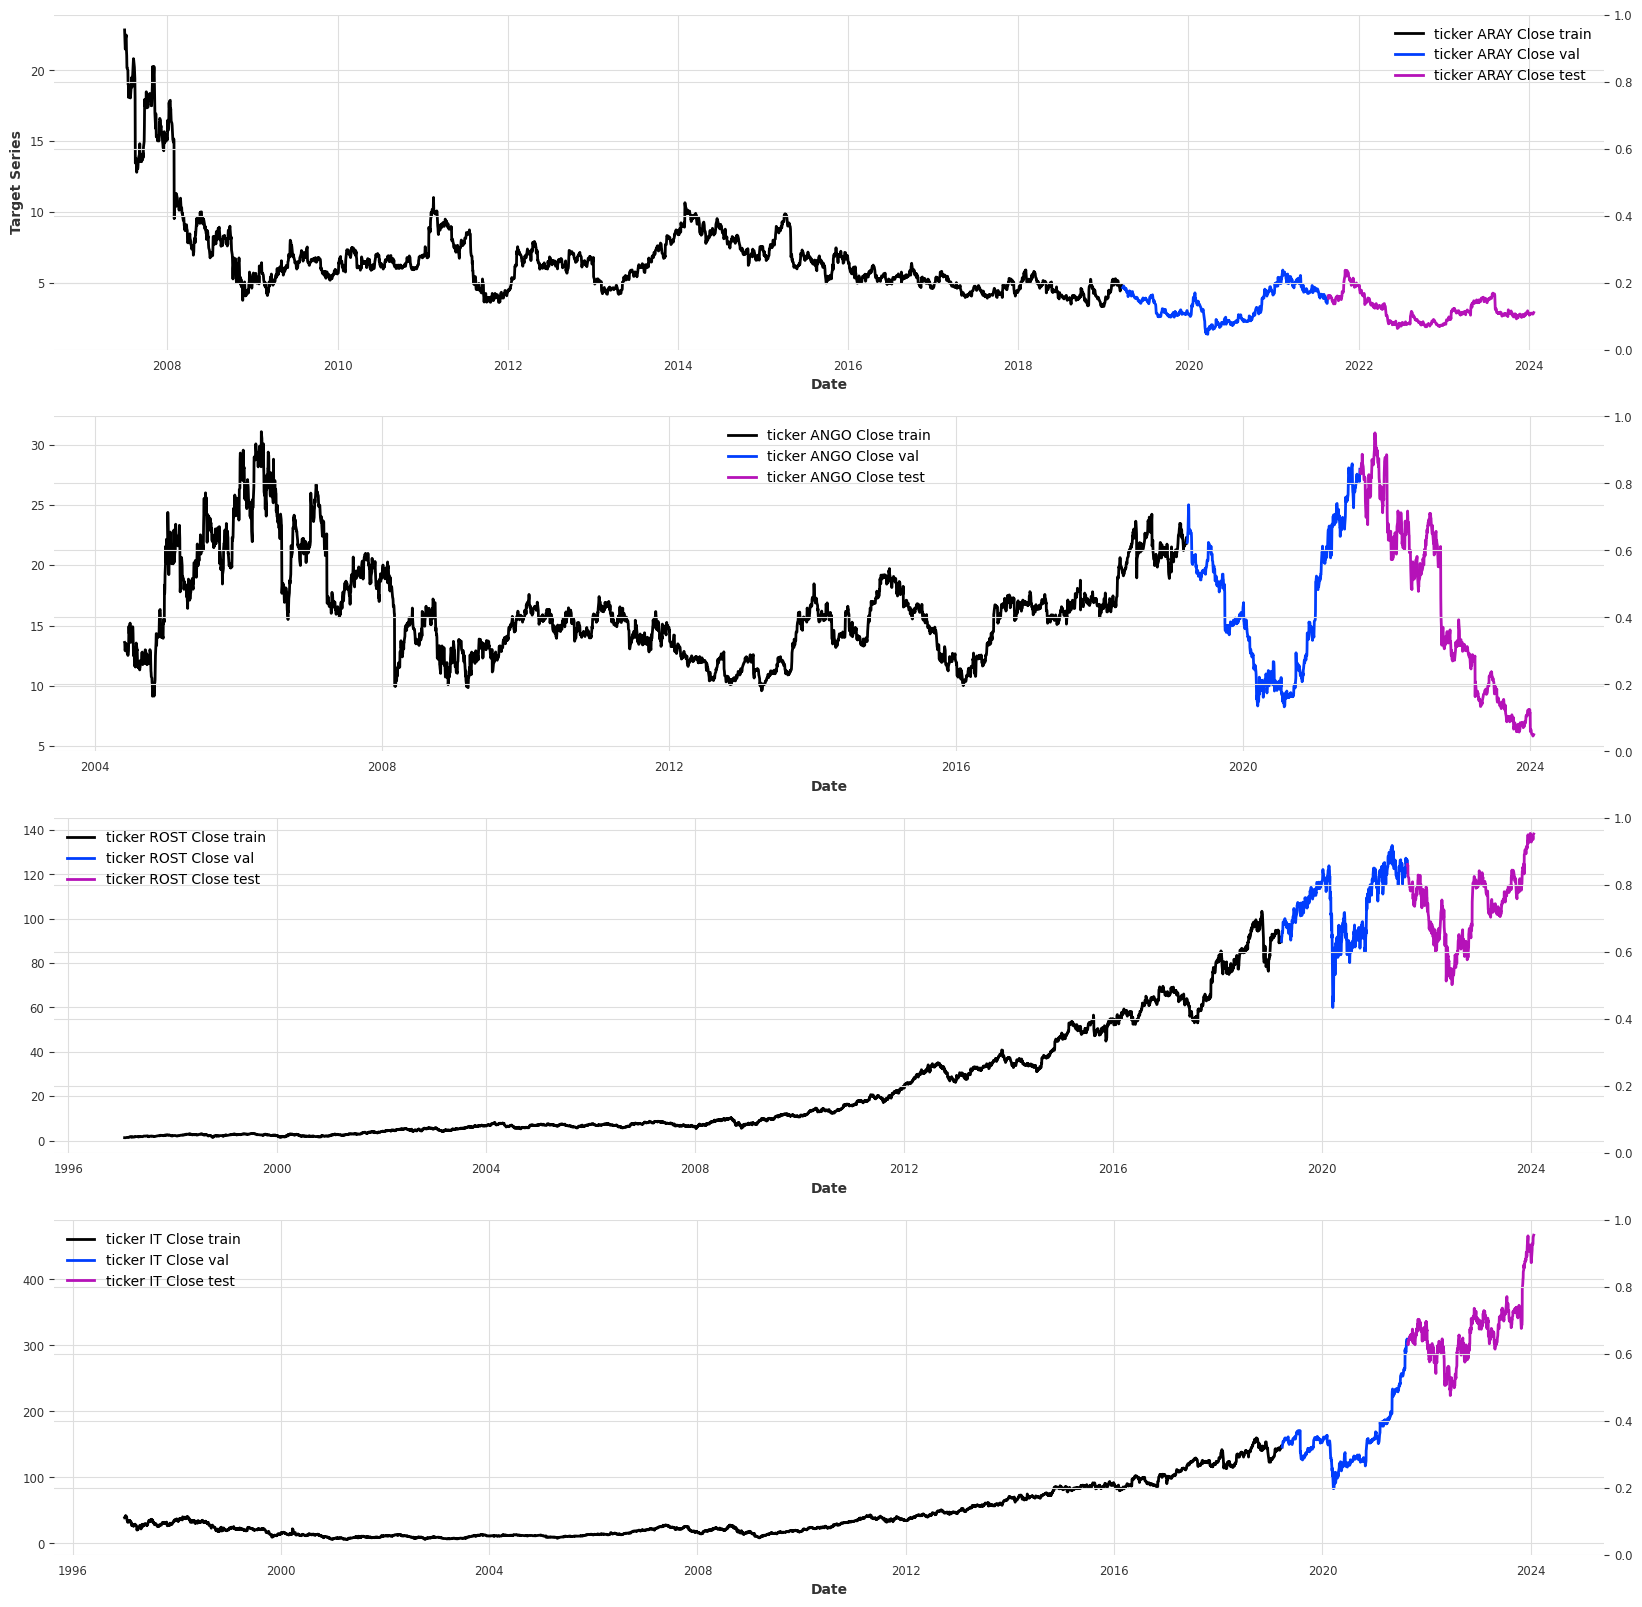

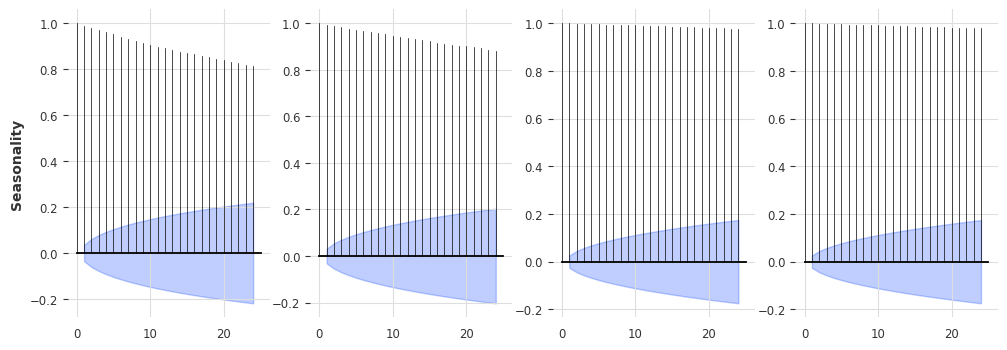

In [25]:
prepare_data()

In [26]:
canswim_model.stock_tickers

['FMX',
 'VUZI',
 'OFLX',
 'ROST',
 'GWW',
 'AEE',
 'WTBA',
 'HRL',
 'IT',
 'MSI',
 'AVD',
 'VSEC',
 'CMCL',
 'FLEX',
 'CYRX',
 'HPP',
 'STNG',
 'IDXX',
 'SRCE',
 'TMO',
 'TSLX',
 'HCI',
 'KLAC',
 'NXDT',
 'RHI',
 'ARCB',
 'PKBK',
 'ARAY',
 'FDS',
 'CVLG',
 'FNLC',
 'AKTS',
 'OTTR',
 'NAVI',
 'NBN',
 'NAT',
 'NEM',
 'CEVA',
 'LPG',
 'ANGO',
 'PNW',
 'NXPI',
 'CODI',
 'KWR',
 'PYPL',
 'KFS',
 'NFBK',
 'RMAX',
 'GBDC',
 'SCWO']

In [27]:
t = list(canswim_model.targets.target_series.keys())[0]
t

'ARAY'

In [28]:
canswim_model.target_train_list[0].pd_dataframe()

component,Close
Date,
1998-01-02,42.812500
1998-01-05,42.500000
1998-01-06,41.875000
1998-01-07,41.500000
1998-01-08,41.000000
...,...
2019-03-18,72.510002
2019-03-19,72.000000
2019-03-20,72.230003


In [29]:
future_covs = canswim_model.future_cov_list[0].pd_dataframe().tail(500)
past_covs = canswim_model.future_cov_list[0].pd_dataframe().tail(500)

In [30]:
len(canswim_model.targets_list)

46

In [31]:
len(canswim_model.target_train_list)

46

In [32]:
len(canswim_model.past_cov_list)

46

In [33]:
len(canswim_model.future_cov_list)

46

## Find optimal hyper parameters

In [34]:
canswim_model.find_model()


[I 2024-01-27 12:15:48,098] A new study created in memory with name: no-name-28ee2dfa-97b2-444d-a472-22e4b97403d8


  0%|          | 0/100 [00:00<?, ?it/s]

Creating a new model


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name                  | Type             | Params
-----------------------------------------------------------
0 | criterion             | MSELoss          | 0     
1 | train_metrics         | MetricCollection | 0     
2 | val_metrics           | MetricCollection | 0     
3 | past_cov_projection   | _ResidualBlock   | 111 K 
4 | future_cov_projection | _ResidualBlock   | 120 K 
5 | encoders              | Sequential       | 5.0 M 
6 | decoders              | Sequential       | 9.0 M 
7 | temporal_decoder      | _ResidualBlock   | 4.8 K 
8 | lookback_skip         | Linear           | 117 K 
-----------------------------------------------------------
14.4 M    Trainable params
0         Non-trainable params
14.4 M    Total params
57.616    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

In [ ]:
# if a model has not been selected and saved yet
# run a hyper parameter search
# otherwise load saved model and continue training
if not canswim_model.load_model():
    # find and save the optimal model configuration
    canswim_model.find_model()

## Train model

### Run model training loop

In [ ]:

# train loop
for i in range(10):
    # align all data series for training
    canswim_model.train()
    # save model checkpoint
    canswim_model.save()
    # quick test progress at modelcheckpoing
    canswim_model.test()
    canswim_model.plot_test_results()    
    # thorough backtest of model checkpoint
    backtest, test_error = canswim_model.backtest()        
    print(f"Backtest Quantile Loss = {test_error}")
    canswim_model.plot_backtest_results(backtest)    
    # prepare next sample subset
    prepare_data()
